In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import BayesianGaussianMixture

In [12]:
from get_data import gmm_playlists_to_csv
gmm_playlists_to_csv('bornofawesomeness')

### edit above lines if moodify is running and you wish to
### use someone else's data

'data.csv updated for the user bornofawesomeness'

In [13]:
df = pd.read_csv('data.csv')
df

,track_id,track_name,playlist_id,danceability,energy,acousticness,valence,tempo
0,2I0G8OVqgjLvY5fBC9Qc0J,Mountains and Molehills - feat. Turin Brakes,0,0.595,0.763,0.010500,0.0380,139.983
1,295nnPutAyvfXpVsfwJbga,Sweet Shop,0,0.592,0.886,0.004870,0.1050,139.913
2,3k3DZvTCSD4HKvj26dQDk8,Jump Ya Body - Dub Mix,0,0.734,0.969,0.037200,0.2260,140.024
3,2XbF32Nwvi5Kz7BRR4cIGz,Thundergun,0,0.527,0.846,0.000048,0.0631,140.008
4,5gaZEkMg6D9QuOnmAVpYVX,The Great Divide - Seven Lions Dub Mix,0,0.490,0.739,0.002010,0.1840,140.019
5,4X3VVecJOhRO1TXThYNY2x,Raindrops - Flinch Remix,0,0.570,0.918,0.005790,0.4670,140.039
6,5pXXTubAeE6K72UH94kKzJ,Blue,0,0.399,0.630,0.000840,0.0377,139.980
7,1uY4O332HuqLIcSSJlg4NX,A Reach For Glory,0,0.601,0.713,0.001540,0.2230,140.015
8,6tuLr8B7NkM9qlhB9SG1Iz,Born - Original Mix,0,0.493,0.799,0.001710,0.1960,141.012
9,5yQmKyKEdjtxFDPIK9mFLn,Rise & Fall (feat. Krewella),0,0.513,0.819,0.002240,0.4450,140.055


In [14]:
df.info()
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 8 columns):
track_id        835 non-null object
track_name      835 non-null object
playlist_id     835 non-null int64
danceability    726 non-null float64
energy          726 non-null float64
acousticness    726 non-null float64
valence         726 non-null float64
tempo           726 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 52.3+ KB


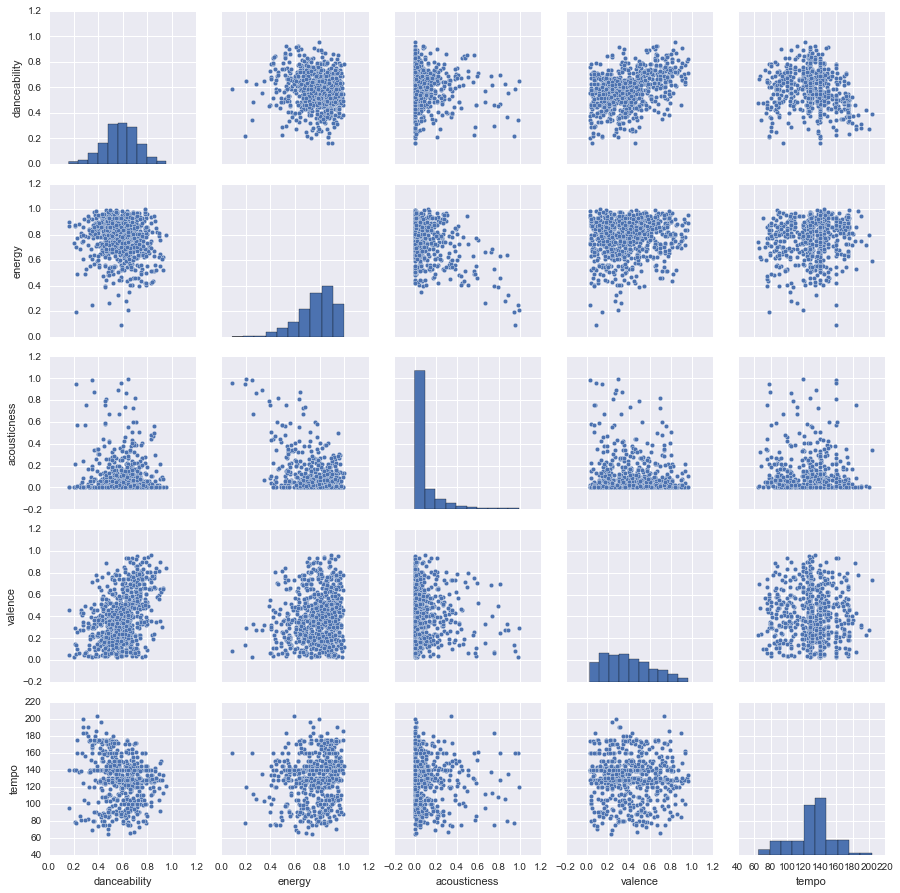

In [15]:
sns.pairplot(df[['danceability', 'energy', 'acousticness', 'valence', 'tempo']])

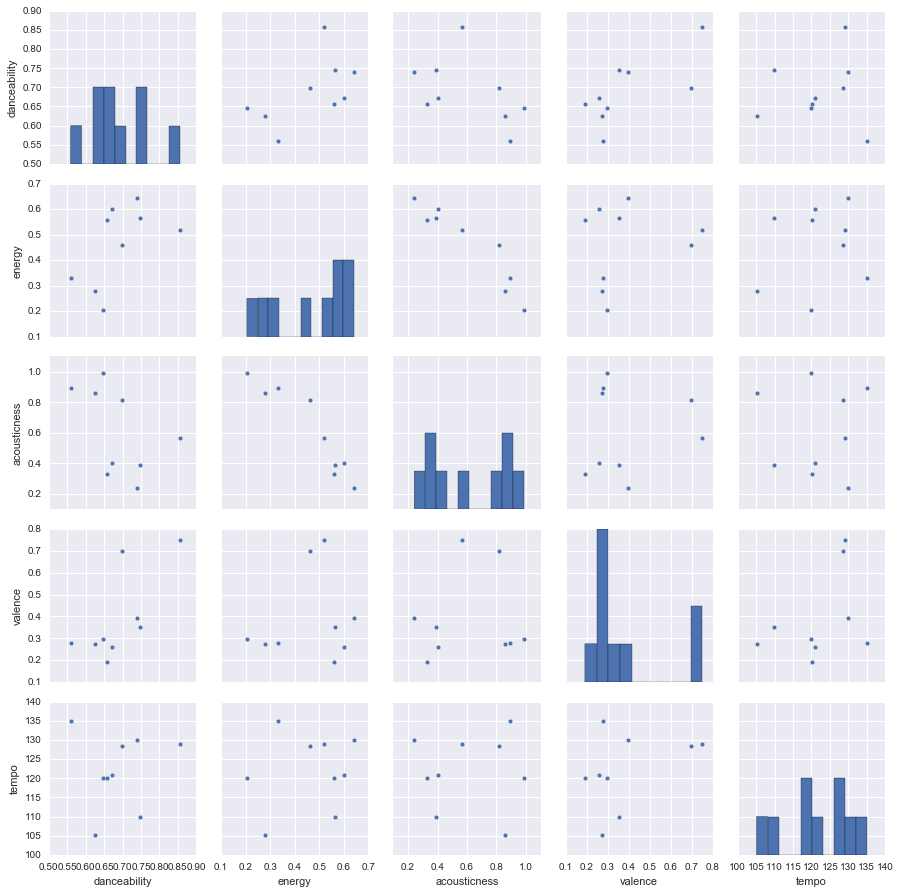

In [22]:
temp_df = df[df['playlist_id'] == 21]
sns.pairplot(temp_df[['danceability', 'energy', 'acousticness', 'valence', 'tempo']])

In [27]:
temp_df

,track_id,track_name,playlist_id,danceability,energy,acousticness,valence,tempo
528,0BO1a9WQ1qCwORuIkFKjjC,A Word From Our Sponsor,21,0.699,0.461,0.816,0.698,128.447
529,4wCmqSrbyCgxEXROQE6vtV,Somebody That I Used To Know,21,0.857,0.517,0.565,0.750,129.063
530,0QwD6Dv9PdUKj2scIciAgu,River Flows in You - Dubstep Remix,21,0.740,0.642,0.242,0.395,130.002
531,7L96oyotFbLOxKAfywRczR,Machine Keys,21,0.646,0.205,0.990,0.298,120.009
532,3nE2A8sGDAI2nzGSI8Rzd6,Same Old Song,21,0.746,0.565,0.387,0.352,109.959
533,47c0P4sWcp9FIv5ryQZ5dr,The Morning - Album Version (Edited),21,0.657,0.559,0.330,0.192,120.055
534,1NarGDteHRuDA9OfGyQ2MG,Hey There Delilah,21,0.624,0.280,0.861,0.272,105.087
535,4kflIGfjdZJW4ot2ioixTB,Someone Like You,21,0.559,0.330,0.892,0.280,135.109
536,4QzEQf6b1RvlVtrqDEcfvB,Coming Down,21,0.672,0.602,0.404,0.260,120.971


In [23]:
data = df['tempo'].values
mean= data.mean()
result = df[(data > mean - 1) & (data < mean + 1)]
print(result.shape)
result

(29, 8)


,track_id,track_name,playlist_id,danceability,energy,acousticness,valence,tempo
181,0IkKz2J93C94Ei4BvDop7P,Party Rock Anthem,3,0.739,0.725,0.023500,0.345,130.024
185,3awfuEyFxNCnCAhklyu4kU,Written In Reverse,3,0.476,0.792,0.005000,0.282,130.002
186,4shgvM4ClrZeDiflNJwlGd,Sugar (feat. Wynter),3,0.738,0.868,0.037100,0.202,130.003
190,69mlHIPayAZVzC32RaVty5,Anchor,3,0.536,0.832,0.007680,0.155,130.069
192,2TcZ05FR0xQWZOaFWyRWUt,L'Amour Toujours - Tiësto Radio Edit,3,0.591,0.931,0.007630,0.174,129.975
210,5brviRvO3ZIDvdF0dED9wC,Bad Wings,3,0.631,0.684,0.013800,0.230,129.961
216,5ujmAC6yp9J29zNnq6BE5i,Alchemy,3,0.578,0.690,0.030400,0.252,129.919
224,2U0pVx4m1Kdm1Gsjjm6iq8,Strangers,3,0.577,0.691,0.013400,0.489,129.984
226,6lbhkPbkKj6jnPTt1FelVo,Bullet Train (feat. Joni Fatora),3,0.546,0.703,0.007970,0.205,129.868
228,77pN4lbCtxyPOWp1iUGev4,H-Town Legends,3,0.663,0.828,0.003370,0.124,129.867


In [24]:
data = df['energy'].values
max_energy = data.max()
min_energy = data.min()
range_ = (max_energy - min_energy) * .1
result = df[(data > max_energy - range_) & (data <= max_energy)]
print(result.shape)
result

(128, 8)


,track_id,track_name,playlist_id,danceability,energy,acousticness,valence,tempo
2,3k3DZvTCSD4HKvj26dQDk8,Jump Ya Body - Dub Mix,0,0.734,0.969,0.037200,0.2260,140.024
5,4X3VVecJOhRO1TXThYNY2x,Raindrops - Flinch Remix,0,0.570,0.918,0.005790,0.4670,140.039
10,19ayyJLKWE9fTMrDBPzsg8,Hot Pursuit - Dead Battery Remix,0,0.555,0.938,0.000855,0.1650,140.019
11,3krehk8mqui3G2AeotY0HV,Make My Whole World,0,0.641,0.950,0.000058,0.2450,140.047
15,05XsaFSfkfX1gp1B8McXen,Now (feat. Rye Rye),0,0.533,0.952,0.024600,0.5150,140.035
16,1yFhsKboncOUUXhRAqcWd2,Vice,0,0.553,0.938,0.000276,0.0333,138.946
18,5e4VwyOKgbNeUNxHbskYbA,Staxx - Original,0,0.516,0.979,0.001670,0.2240,139.902
19,4rwpZEcnalkuhPyGkEdhu0,Scary Monsters And Nice Sprites,0,0.523,0.944,0.003360,0.3200,139.997
33,4gjVjSHvFdzgOTEy2MloqU,The Music's Not Over,0,0.483,0.924,0.007350,0.4430,140.014
37,0fTFmyy8AwWHiRoDgTh80w,Vava Voom,0,0.537,0.970,0.000401,0.1630,140.032


In [25]:
data = df['danceability'].values
max_dance = data.max()
min_dance = data.min()
range_ = (max_dance - min_dance) * .1
result = df[(data > max_dance - range_) & (data <= max_dance)]
print(result.shape)
result

(12, 8)


,track_id,track_name,playlist_id,danceability,energy,acousticness,valence,tempo
284,1pKYYY0dkg23sQQXi0Q5zN,Around The World,7,0.956,0.795,0.003560,0.840,121.294
295,5rb9QrpfcKFHM1EUbSIurX,Yeah!,7,0.894,0.791,0.018300,0.594,105.018
300,6zlOUIqcU6juXFww9UNpJK,Five Hours,7,0.880,0.821,0.019700,0.576,127.907
306,7n8eZAUj6vevNQZ0EF3OH0,Without Me,7,0.926,0.626,0.003010,0.663,112.246
309,7sm1xuahSGG5qFa9pFXWVs,Just Dance - RedOne Remix,7,0.893,0.812,0.003400,0.815,119.021
330,18UhvUi9FjHtoTgnqX7kbl,Drop It Like It's Hot - Album Version (Edited),10,0.903,0.550,0.217000,0.647,92.009
477,7lXCT5xxTVOJAu11FOF8PS,By Your Side,18,0.914,0.624,0.086600,0.626,150.034
482,2lXzgU19U9cSZLJtawjob6,Moar Ghosts 'n' Stuff,18,0.903,0.648,0.000105,0.355,128.014
486,6nmz4imkDcmtwMjocAzFSx,Hotline Bling,18,0.896,0.623,0.002570,0.564,134.962
488,2Vyny7HMXDxIw4NqqkViAn,Cleanin' Out My Closet,18,0.907,0.756,0.081600,0.901,148.017


In [26]:
data = df['valence'].values
max_energy = data.max()
min_energy = data.min()
range_ = (max_energy - min_energy) * .9
result = df[(data > 0) & (data <= max_energy - range_)]
print(result.shape)
result

(77, 8)


,track_id,track_name,playlist_id,danceability,energy,acousticness,valence,tempo
0,2I0G8OVqgjLvY5fBC9Qc0J,Mountains and Molehills - feat. Turin Brakes,0,0.595,0.763,0.010500,0.0380,139.983
1,295nnPutAyvfXpVsfwJbga,Sweet Shop,0,0.592,0.886,0.004870,0.1050,139.913
3,2XbF32Nwvi5Kz7BRR4cIGz,Thundergun,0,0.527,0.846,0.000048,0.0631,140.008
6,5pXXTubAeE6K72UH94kKzJ,Blue,0,0.399,0.630,0.000840,0.0377,139.980
12,4Rw8mKy2QVFYb3ZYnqBpPv,We Are The Sun - SAVOY Remix,0,0.374,0.892,0.000609,0.0915,139.971
16,1yFhsKboncOUUXhRAqcWd2,Vice,0,0.553,0.938,0.000276,0.0333,138.946
23,1zknwaZrdR0Z3nvUbVFFEb,Reaching Out,0,0.448,0.850,0.000443,0.0893,139.977
35,3gB0inHWfzACc0wjolOdpa,When I Look At You,0,0.547,0.737,0.000310,0.0390,140.331
36,56WVULdTfBLm31VzVHXKeV,One Trick Pony,0,0.684,0.679,0.000602,0.0967,140.139
40,4khAZaVsqoaSZfnJNRv2Wi,Mad - Promo Version,0,0.200,0.732,0.000015,0.0328,139.980
